# Problem Statement


The debate of mask wearing in America has crippled our ability to slow the spread of Covid-19. Tools such as this help businesses operate safely and mitigate spread in their buildings.

In this project, I aim to take an existing mask classification project from [Samuel Mohebban](https://github.com/HeeebsInc/FaceMaskEmotionDetection), and enhance the model to better predict when the person is wearing glasses. This technique is commonly referred to as transfer learning.

# Getting the Data

The based model used in this transfer learning project can be found [here](https://github.com/HeeebsInc/FaceMaskEmotionDetection/blob/master/ModelWeights/Mobilenet_Masks.h5). The data used was collected from the following sources and read into Google Colab with the Kaggle API:
- [ ] https://www.kaggle.com/jeffheaton/glasses-or-no-glasses
- [ ] https://www.kaggle.com/milesfranklin/mask-detection
- [x] https://www.kaggle.com/aneerbanchakraborty/face-mask-detection-data
- [x] https://www.kaggle.com/harry418/dataset-for-mask-detection

Note: Checkmarks indicate that data was used in the final model.

# Folder Architecture for Data


Data is split in an 80% - 10% - 10% fashion in the following folder schema.

- Train
    - Mask: 2087 images
    - No_Mask: 2269 images
- Test
    - Mask: 261 images
    - No_Mask: 397 images
- Validaion
    - Mask: 261 images
    - No_Mask: 397 images

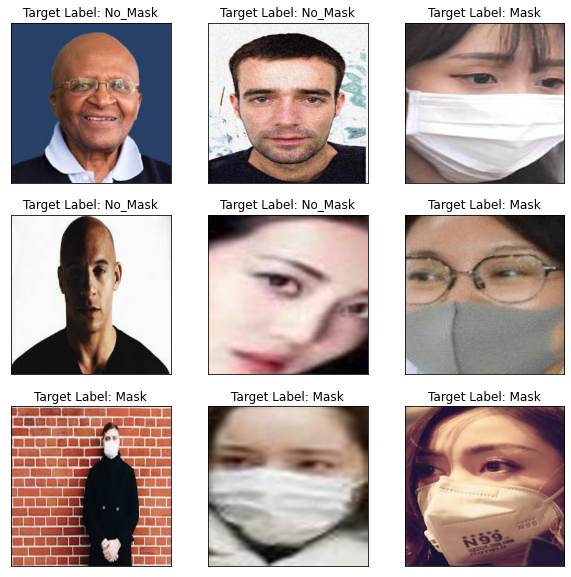

#  Explore many different models and short-list the best ones

The reported Confusion Matrices for the base model were reported as shown below, and can be found [here](https://github.com/HeeebsInc/FaceMaskEmotionDetection/blob/master/Images/Mobilenet_CM.png) from the GitHub Repository.

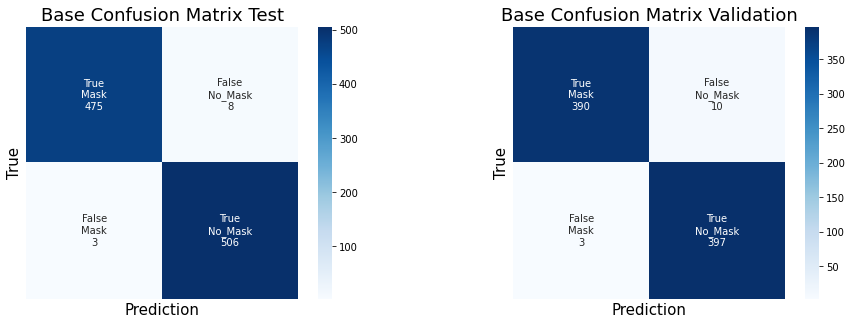

Unfortunately, I was unable to reproduce this matrix on new, unseen data, and began this project with this matrix instead. Instead, the model naively assumes that nearly all of the images fall under the No Mask category. 

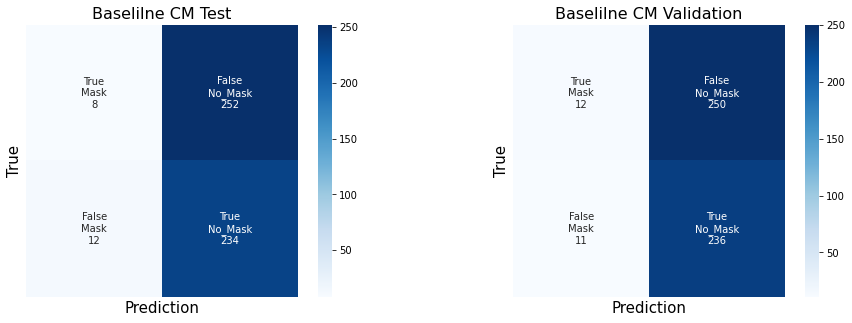

# Present Solution

In [9]:
import tensorflow as tf
from google.colab import files

data_to_load = files.upload()

In [13]:
new_model = tf.keras.models.load_model("/content/Model_Mask_vs_No_Mask_1237_4000.h5")
# new_model = tf.keras.models.load_model("Model_Mask_vs_No_Mask_1237_4000.h5")

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
Transfer_Learning_1 (Dense)  (None, 256)               65792     
_________________________________________________________________
Transfer_Learning_2 (Dense)  (None, 256)               6

# Fine-tuning the Model

To train the model, I used the following callback functions seen below. This allowed me to tweak the learning rate in real time and manage the overall duration of the training process. This was a helpful technique to use because it gave me the freedom to break up the training as needed and evaluate the model without having to wait on an arbitrary epoch number. Additionally, this approach allowed me to look out for plateaus in the learning process and systematically pause the training at an ideal time. 

```
csv = tf.keras.callbacks.CSVLogger(
    filename="/content/Model/Transfer_Learning_Model_History.csv", 
    separator=',', append=False
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/Model/Transfer_Learning_Model.h5", 
    monitor='val_loss', verbose=1, save_best_only=True
)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min'
)

history = model.fit(train_generator, 
                    epochs=30,
                    validation_data = val_generator,
                    callbacks=[early_stop, check_point, plateau])
```

# Final Model

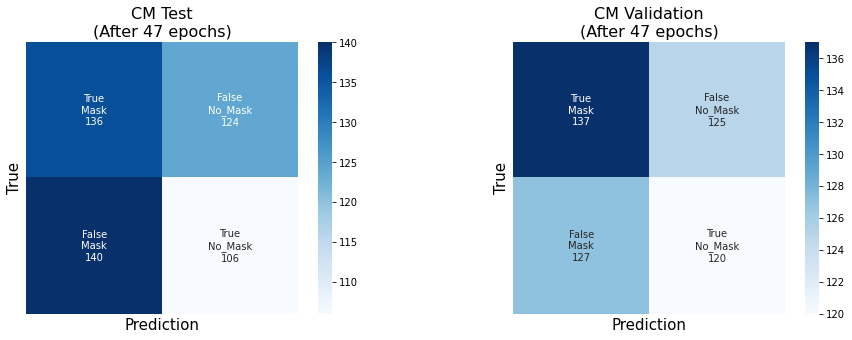

# Limitations and Later Work

I am still unsure why the imported model performed as poorly as it did, but this was a major setback in the ability to make meaningful progress. It would certainly be helpful to simply have the model perform as reported before making any additional attempts to further train the model. With that said, the original goal of the project was to enhance the model’s ability to predict on images where the individual is wearing glasses and a mask. It was difficult to find a data set that had a large number of images matching this description, so I had hoped to accomplish this through a slightly different process. The goal was to improve the model’s accuracy on this sub group by adding the [Glasses vs No Glasses](https://www.kaggle.com/jeffheaton/glasses-or-no-glasses) set to train on. 


# References and contributions

<pre>
URL            : https://github.com/HeeebsInc/FaceMaskEmotionDetection
Author         : Samuel Mohebban
Purpose        : This repository holds the base model used in the transfer learning process.
</pre>
<pre>
URL            : https://github.com/miles-frankllin/Data_603/blob/main/Mask_Classification_CNN.ipynb
Author         : Miles Franklin
Purpose        : This is a previous attempt I made for mask classification before learning about transfer learning. I used this for refernce code and syntax.
</pre>
<pre>
URL            : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
Author         : Jason Brownlee
Purpose        : This was a helpful introduction to transfer learning and understanding how network types of different layers work.
</pre>
<pre>
URL            : https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299
Author         : Ferhat Culfaz
Purpose        : This was a helpful guide and introduction to transfer learning.
</pre>





